# Implicit Methods
So far we have seen explicit methods, where the slope is computed from the current state of the system.

Even when we perform several intermediate calculations as in the case of the Runge-Kuta methods of 2nd order or higher. For the Euler method the explicit, or forward method, is

$$u^{k+1} = u^k + f\left(u^k, t^k\right) \Delta t$$

The explicit methods are easy to implement and probably to understand too, but many times have unstable outputs for higher $\Delta t$ values. What is higher $\Delta t$ values is problem and model dependent.

Stiff problems are more prone to unstable results, in some cases a small change in the $\Delta t$ can strongly change the output from stable to unstable. What is a stiff model is somewhat a fuzzy concept.

The implicit methods are more robust in matters of stability. The Euler implicit method, or backward Euler method is:

$$u^{k+1} = u^k + f\left(u^{k+1}, t^{k+1}\right) \Delta t$$

This is, the computation of $u^{k+1}$ depends on it self.

If the model is a linear model it is possible to write:

$$ u^{k+1} = u^k + \left(Au^{k+1} + b\left(t^{k+1}\right)\right) \Delta t$$

$$ \left(I-A\Delta t\right)u^{k+1} = u^k + b\left(t^{k+1}\right)\Delta t$$

With the right side of the equation being constants it is possible to solve using a linear equation solver method.

For non-linear models is more computational demanding.

$$ u^{k+1} = u^k + f\left(u^{k+1}, t^{k+1}\right) \Delta t$$

$$\frac{1}{\Delta t} \left(u^{k+1} - u^k\right) - f\left(u^{k+1}, t^{k+1}\right) = 0$$

And now it is possible to use a root find method considering $u^{k+1}$ as the independent variables vector.

The function we want to find the root, let’s call it the residual function, is:

$$r(v) = \frac{1}{\Delta t} \left(v - u^k\right) - f\left(v, t^{k+1}\right)$$

The $v$ that is the root of $r(v)$ will be the next $u^{k+1}$.

Careful that while applying the Newton method, or other root numerical method, the value of $u^{k}$ is fixed and it is the last point on the Backward Euler method.

For the Newton method each iteration approaching the root is obtained with

$$J(r^l) \Delta \textbf{v} = -r^l$$
$$v^{l+1} = v^{l} + \Delta v$$

If using the Newton-Raphson, or similar methods, we would need to compute the jacobian of this equation.

$$J = \nabla\left(\frac{1}{\Delta t} \left(v - u^k\right) - f\left(v, t^{k+1}\right)\right)$$

$$ J = \frac{1}{\Delta t} I - \nabla f\left(v, t^{k+1}\right)$$

## Exercise

Apply the backward Euler method to the prey-predator model previously analyzed.

$$\begin{equation}
    \begin{cases}
        \dot{u}_0 = au_0 - bu_0u_1 \\
        \dot{u}_1 = -mu_1 + cbu_0u_1
    \end{cases}
\end{equation}$$

Using the same values for the model parameters:

$$\begin{equation}
    \begin{cases}
        a = 2.0 \: \mathrm{month^{-1}} \\
        b = 0.01 \: \mathrm{foxes^{-1} month^{-1}} \\
        c = 0.1 \: \mathrm{foxes \: rabbits^{-1}} \\
        m = 1.0 \: \mathrm{month^{-1}}
    \end{cases}
\end{equation}$$

Before start coding we need to check what data we need to use the implicit method.

We need the slope or forcing function, the Jacobian function, the model parameters, the initial state, the total time and the $\Delta t$

$$J = \begin{bmatrix}
        a - bu_1 &amp; -bu_0 \\
        cbu_1 &amp; -m + cbu_0
    \end{bmatrix}$$

Using the Newton-Raphson method we will have to solve:

$$\frac{1}{\Delta t} I - J\left(f\left(v, t^{k+1}\right)\right) \Delta v = -\left(\frac{1}{\Delta t} \left(v - u^k\right) - f\left(v, t^{k+1}\right)\right)$$

Updating the $u$ values until the difference are within a very small tolerance to 0.

In [ ]:
import numpy as np

# Parameters
a = 2.0
b = 0.01
c = 0.1
m = 1.0
delta_t = 0.1
total_time = 5.0

# Initial conditions
u0 = np.array([40.0, 9.0])

# Define the forcing function
def f(u):
    return np.array([a*u[0] - b*u[0]*u[1], -m*u[1] + c*b*u[0]*u[1]])

# Define the Jacobian of the forcing function
def jacobian(u):
    return np.array([[a - b*u[1], -b*u[0]], [c*b*u[1], -m + c*b*u[0]]])

# Time-stepping
num_steps = int(total_time / delta_t)
u = u0
t = 0.0

# Newton-Raphson parameters
tolerance = 1e-6
max_iterations = 100

# Store the results
results = np.zeros((num_steps + 1, 2))
results[0, :] = u0

# Perform the time integration
for step in range(1, num_steps + 1):
    t += delta_t
    u_prev = u
    
    # Newton-Raphson method to solve for u^(k+1)
    for _ in range(max_iterations):
        # Residual function
        r = (u - u_prev) / delta_t - f(u)
        
        # Check for convergence
        if np.linalg.norm(r) < tolerance:
            break
        
        # Jacobian for Newton-Raphson
        J = np.eye(2) / delta_t - jacobian(u)
        
        # Newton-Raphson update
        delta_u = np.linalg.solve(J, -r)
        u += delta_u
    
    # Store the result
    results[step, :] = u

# Print the results
for i, (rabbit, fox) in enumerate(results):
    print(f"Step {i}: Rabbits = {rabbit:.4f}, Foxes = {fox:.4f}")


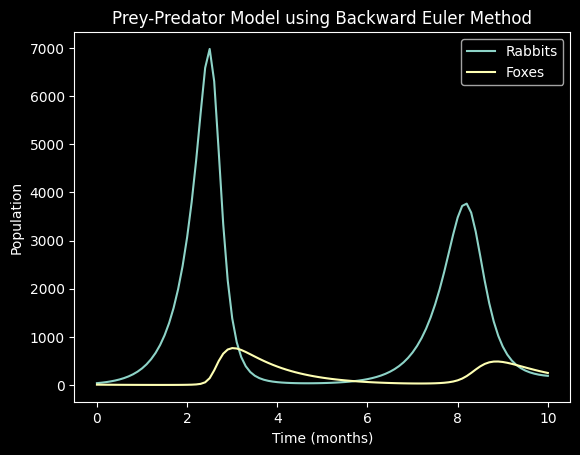

In [3]:
import numpy as np

# Parameters
a = 2.0
b = 0.01
c = 0.1
m = 1.0

# Time parameters
total_time = 10.0
delta_t = 0.1
num_steps = int(total_time / delta_t)

# Initial state
u = np.array([40.0, 9.0])  # Initial populations of rabbits and foxes
u_values = np.zeros((num_steps + 1, 2))
u_values[0, :] = u

# Forcing function
def f(u):
    return np.array([a * u[0] - b * u[0] * u[1], -m * u[1] + c * b * u[0] * u[1]])

# Jacobian of the forcing function
def jacobian(u):
    return np.array([[a - b * u[1], -b * u[0]], [c * b * u[1], -m + c * b * u[0]]])

# Newton-Raphson method to solve for v
def newton_raphson(u_k, delta_t, tol=1e-6, max_iter=100):
    v = u_k  # Initial guess
    for _ in range(max_iter):
        r = (v - u_k) / delta_t - f(v)
        J = np.eye(2) / delta_t - jacobian(v)
        delta_v = np.linalg.solve(J, -r)
        v = v + delta_v
        if np.linalg.norm(delta_v) < tol:
            break
    return v

# Time-stepping loop
for k in range(num_steps):
    u_values[k + 1, :] = newton_raphson(u_values[k, :], delta_t)

# Plotting the results
import matplotlib.pyplot as plt

time_points = np.linspace(0, total_time, num_steps + 1)
plt.plot(time_points, u_values[:, 0], label='Rabbits')
plt.plot(time_points, u_values[:, 1], label='Foxes')
plt.xlabel('Time (months)')
plt.ylabel('Population')
plt.legend()
plt.title('Prey-Predator Model using Backward Euler Method')
plt.show()
